In [136]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
%pprint off
plt.style.use('seaborn')

Pretty printing has been turned OFF


In [137]:
df_all = pd.read_csv('data/cleaned.csv')
len(df_all)

593956

In [138]:
df_all = df_all.set_index(pd.to_datetime(df_all['localminute']), drop=True)

In [139]:
df_all = df_all.drop(columns=['Unnamed: 0', 'localminute'])

In [140]:
display(df_all.head(), len(df_all))

,marginal_change,cumul_value,meterid
localminute,,,
2015-10-01 05:00:00,0.0,93470.0,35
2015-10-01 06:00:00,0.0,93470.0,35
2015-10-01 07:00:00,0.0,93470.0,35
2015-10-01 08:00:00,0.0,93470.0,35
2015-10-01 09:00:00,0.0,93470.0,35


593956

In [141]:
groups = df_all.groupby('meterid')
keys = groups.groups.keys()  # keys: an iterable of dataids or meter ids

In [142]:
id_list = list(keys)
display(id_list, len(id_list))

[35, 44, 77, 94, 114, 187, 222, 252, 370, 483, 484, 661, 739, 744, 871, 1042, 1086, 1103, 1185, 1283, 1403, 1415, 1507, 1556, 1589, 1619, 1697, 1714, 1718, 1790, 1791, 1792, 1800, 1801, 2018, 2034, 2072, 2094, 2129, 2233, 2335, 2378, 2449, 2461, 2470, 2575, 2638, 2755, 2814, 2818, 2945, 2946, 2965, 2980, 3036, 3039, 3134, 3310, 3367, 3527, 3544, 3577, 3635, 3723, 3778, 3849, 3893, 3918, 4029, 4031, 4193, 4228, 4296, 4352, 4356, 4373, 4421, 4447, 4514, 4732, 4767, 4998, 5129, 5131, 5193, 5275, 5317, 5395, 5403, 5439, 5484, 5636, 5658, 5785, 5810, 5814, 5892, 5972, 6412, 6505, 6578, 6673, 6685, 6830, 6836, 6863, 6910, 7016, 7017, 7030, 7117, 7287, 7429, 7460, 7674, 7682, 7739, 7741, 7794, 7900, 7919, 7965, 7989, 8059, 8084, 8086, 8155, 8156, 8244, 8386, 8467, 8703, 8829, 8890, 8967, 9052, 9121, 9134, 9160, 9278, 9295, 9474, 9600, 9631, 9639, 9729, 9766, 9849, 9956, 9982]

150

### Visualize meter data.

In [143]:
# for i in id_list:
#     df_i = groups.get_group(i)
#     #df_i['cumul_value'].plot(figsize=(15,4), title=f'meter {i}, {len(df_i)} samples')
#     plt.cla()
#     fig = plt.gcf()
#     fig.set_size_inches(15,4)
#     plt.title(f'meter {i}, {len(df_i)} samples')
#     plt.scatter(x=df_i.index, y=df_i['cumul_value'])
#     plt.show()

### LINEAR REGRESSION

In [144]:
# combine all meterids' data. create new columns for 1 hot encoding indicating which meterid the datapoint belongs to
# it is possible to extend this model by using one-hot encoding to indicate a particular cluster of meterids instead. 

# df_combinedxy = pd.DataFrame()
# for meterid in id_list:
#     df_i = groups.get_group(meterid)
#     df_x = df_i.index.to_series()
#     df_y = df_i[f'cumul_value']
#     df_xy = pd.concat([df_x, df_y], axis=1, ignore_index=True)
#     df_combinedxy = df_combinedxy.append(df_xy, ignore_index=True)
# df_combinedxy.columns = ['localminute', 'cumul_value']
# display(df_combinedxy.head(), df_combinedxy.describe())

# generate new columns for one-hot encoding.

In [145]:
# NOTE: need to normalize the cumulative values before fitting the model over the values!!

In [146]:
from sklearn.linear_model import LinearRegression

In [147]:
# split dataset into train, val, test (how?)
# normalize cumul values?
# lr_model.fit(x, y)
# score on train set
# score on test set
# plot timeseries of actual value and timeseries of predicted value on same plot
# is this for each meter? or how do we generate a set of actual values representing all meters?
# plot predicted value vs actual value. plot predicted value = actual value. analyse variance and bias.

"""
if predicting an average consumption pattern, then x and y axis must be normalized. 
maybe normalize each meterid's y data by subtracting all cumul_values by the first cumul_value. 
the model then predicts the change from the first available datapoint.
!UNCLEAR how to normalize x axis. 
"""

"""
since different households (HH) have different consumption patterns, with some HH's consumption patterns being quite 
correlated with other HHs, it might be good to fit different models for each of these 'clusters'.
That way, we can get higher prediction accuracy for specific HHs in each cluster.
Can we clearly identify different clusters from the corr analysis done in Part 1?
"""

# repeat above using SVR, tune parameters with validation dataset.

"\nsince different households (HH) have different consumption patterns, with some HH's consumption patterns being quite \ncorrelated with other HHs, it might be good to fit different models for each of these 'clusters'.\nThat way, we can get higher prediction accuracy for specific HHs in each cluster.\nCan we clearly identify different clusters from the corr analysis done in Part 1?\n"

In [148]:
# Linear Regression model for one meterid.
meterid = 44
df_i = groups.get_group(meterid)
df_i.head()

,marginal_change,cumul_value,meterid
localminute,,,
2015-10-12 23:00:00,0.0,165674.0,44
2015-10-13 00:00:00,0.0,165674.0,44
2015-10-13 01:00:00,0.0,165674.0,44
2015-10-13 02:00:00,10.0,165684.0,44
2015-10-13 03:00:00,0.0,165684.0,44


In [149]:
lr_model = LinearRegression()

# convert DateTimeIndex to numerical values for regression.
# each hour is now denoted by an integer.
X = np.arange(start=0, stop=len(df_i.index), step=1).reshape(-1, 1)

y = df_i['cumul_value']
# should we shift y axis down by first cumul value? more meaningful? can more easily compare across meterids?

In [150]:
# split dataset

valid_start, test_start = int(len(df_i)*0.7), int(len(df_i)*0.8)
x_train, x_valid, x_test = X[:valid_start,:], X[valid_start:test_start,:], X[test_start:,:]
y_train, y_valid, y_test = y[:valid_start], y[valid_start:test_start], y[test_start:]

In [151]:
lr_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [152]:
# run predictions and get scores

y_train_pred = lr_model.predict(x_train)
r2_train = lr_model.score(x_train, y_train)

y_valid_pred = lr_model.predict(x_valid)
r2_valid = lr_model.score(x_valid, y_valid)

y_test_pred = lr_model.predict(x_test)
r2_test = lr_model.score(x_test, y_test)

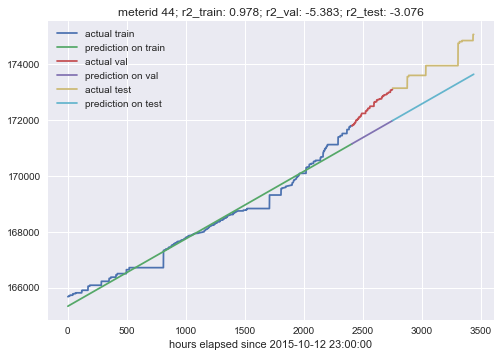

In [153]:
# plot results

plt.title(f'meterid {meterid}; r2_train: {r2_train:.3f}; r2_val: {r2_valid:.3f}; r2_test: {r2_test:.3f}')
plt.xlabel(f'hours elapsed since {df_i.index[0]}') 
plt.plot(x_train, y_train, label='actual train')
plt.plot(x_train, y_train_pred, label='prediction on train')

plt.plot(x_valid, y_valid, label='actual val')
plt.plot(x_valid, y_valid_pred, label='prediction on val')

plt.plot(x_test, y_test, label='actual test')
plt.plot(x_test, y_test_pred, label='prediction on test')

plt.legend()

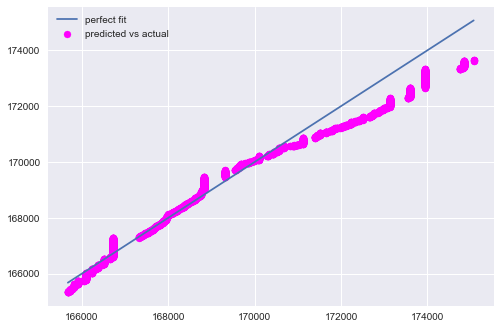

In [159]:
# plot actual vs predicted value
actual = []
actual.extend(y_train)
actual.extend(y_valid)
actual.extend(y_test)
len(actual)

predicted = []
predicted.extend(y_train_pred)
predicted.extend(y_valid_pred)
predicted.extend(y_test_pred)
len(predicted)

plt.scatter(actual, predicted, color='magenta', label='predicted vs actual')
plt.plot(actual, actual, label='perfect fit')
plt.legend()